In [2]:
import pandas as pd

In [3]:
#importing the dataset as a corpus using the pandas library
data = pd.read_csv('data.csv')
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
#inspecting the data to see what it looks like
data['Body'][0]

'Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously missed their shift this morning. — Senator Bo

In [5]:
data['Body'][:7]

0    Image copyright Getty Images\nOn Sunday mornin...
1    LONDON (Reuters) - “Last Flag Flying”, a comed...
2    The feud broke into public view last week when...
3    MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4    Country singer Jason Aldean, who was performin...
5    JetNation FanDuel League; Week 4\n% of readers...
6    In 2012, Kansas lawmakers, led by Gov. Sam Bro...
Name: Body, dtype: object

In [6]:
#Looking at the data, there are some missing columns, so let's take care of that
data.fillna('Article unavailable')

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",Article unavailable,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [7]:
#data cleaning with text preprocessing techniques
#data cleaning first round
#using regular expressions and string to clean

import re
import string

In [8]:
#function for first round of data cleaning
def clean_text_round1(text):
    text = str(text).lower() #making all text lowercase
    text = re.sub('\[.*?\]', '', text) #removing full stops and question marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #removing digits
    return text

round1 = lambda x: clean_text_round1(x)

In [9]:
#Let's take a look at the updated text
data_clean = pd.DataFrame(data.Body.apply(round1))
data_clean['Body'][0]

'image copyright getty images\non sunday morning donald trump went off on a twitter tirade against a member of his own party\nthis in itself isnt exactly huge news its far from the first time the president has turned his rhetorical cannons on his own ranks\nthis time however his attacks were particularly biting and personal he essentially called tennessee senator bob corker the chair of the powerful senate foreign relations committee a coward for not running for reelection\nhe said mr corker begged for the presidents endorsement which he refused to give he wrongly claimed that mr corkers support of the iranian nuclear agreement was his only political accomplishment\nunlike some of his colleagues mr corker  free from having to worry about his immediate political future  didnt hold his tongue\nskip twitter post by senbobcorker its a shame the white house has become an adult day care center someone obviously missed their shift this morning — senator bob corker senbobcorker october   repor

In [10]:
#let's apply a second round of cleaning because some nonsensical text was ignored in the first clean
def clean_text_round2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [11]:
#let's take a look at the updated text again
data_clean = pd.DataFrame(data_clean.Body.apply(round2))
data_clean['Body'][0]

'image copyright getty imageson sunday morning donald trump went off on a twitter tirade against a member of his own partythis in itself isnt exactly huge news its far from the first time the president has turned his rhetorical cannons on his own ranksthis time however his attacks were particularly biting and personal he essentially called tennessee senator bob corker the chair of the powerful senate foreign relations committee a coward for not running for reelectionhe said mr corker begged for the presidents endorsement which he refused to give he wrongly claimed that mr corkers support of the iranian nuclear agreement was his only political accomplishmentunlike some of his colleagues mr corker  free from having to worry about his immediate political future  didnt hold his tongueskip twitter post by senbobcorker its a shame the white house has become an adult day care center someone obviously missed their shift this morning — senator bob corker senbobcorker october   reportthat wasnt 

In [12]:
#Split the data into folds
#from sklearn.model_selection import StratifiedKFold

#kf = StratifiedKFold(n_splits = 2)
#kf.get_n_splits(X)

In [13]:
# We are going to create document-term matrix using the tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words = 'english', max_df = 0.7) #removing all english stop words
data_tf = tf.fit_transform(data_clean.Body)
data_dtm = pd.DataFrame(data_tf.toarray(), columns = tf.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aaa,aakash,aall,aalo,aamir,aapglenn,aaplo,aaploq,aapmorgan,...,½no,½the,½two,álvaro,école,émigrés,ðÿ,œbrilliant,əˈnänəməs,ʺhe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#let's pickle the data_dtm for future use
#data_dtm.to_pickle("dtm.pkl")

In [15]:
#let's pickle the cleaned data for future use
import pickle

data_clean.to_pickle('data_clean.pkl')
pickle.dump(tf, open('cv.pkl', 'wb'))

In [17]:
#Data cleaning is complete now we go on to EDA to see if the data we have makes sense
#lets find the top words that are mostly used in fake news and true news

data_dtm = data_dtm.transpose()
data_dtm.head()

,0,1,2,3,4,5,6,7,8,9,...,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aakash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#find the top words used in each article

top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending = False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict    

{0: [('corker', 0.41407565371096977),
  ('mr', 0.3401786542603187),
  ('president', 0.19725968920183917),
  ('presidents', 0.17244842931159016),
  ('kelly', 0.1618608082758003),
  ('trumps', 0.13631767528537733),
  ('senbobcorker', 0.10062988432961618),
  ('trump', 0.0996465720588618),
  ('white', 0.09657193127185562),
  ('copyright', 0.09412304354724144),
  ('isnt', 0.08986720350847913),
  ('image', 0.08625193099875883),
  ('bob', 0.08435376934394577),
  ('senator', 0.08302542140330305),
  ('getty', 0.08047823366730404),
  ('senate', 0.07691445392905036),
  ('cop', 0.07559854474090351),
  ('house', 0.07359322596924184),
  ('endorsement', 0.0710876334950293),
  ('secretary', 0.06929207392236565),
  ('caption', 0.06912577135926194),
  ('twitter', 0.06907187147369007),
  ('administration', 0.06609328066987362),
  ('silent', 0.06588635421117026),
  ('senators', 0.06474432331032012),
  ('seemingly', 0.06345769497604756),
  ('attempting', 0.06229867565386569),
  ('challenging', 0.0604641636

In [19]:
#print the top 15 words used by true and fake news articles

for Label, top_words in top_dict.items():
    print(Label)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
corker, mr, president, presidents, kelly, trumps, senbobcorker, trump, white, copyright, isnt, image, bob, senator
---
1
cranston, flying, linklater, flag, film, london, bryan, richard, odeon, bfi, reutersafolabi, leicester, festival, premiere
---
2
mr, corker, president, trump, republicans, senator, republican, senators, mcconnell, senate, conant, murkowski, pence, said
---
3
oil, pemex, partner, companiescardenasmora, cardenasmora, cheiron, boe, tabasco, sq, onshore, tieup, finalized, decadeslong, reserves
---
4
pettys, aldean, tribute, singing, wont, performing, singer, cold, jason, tom, victims, families, saturday, shooting
---
5
fanduel, league, week, lineup, pick, enterremember, httpfanduelcomjetnationyou, wantclick, newsour, jetnation, salary, cap, prize, enter
---
6
passthrough, tax, income, kansas, percent, beaty, mr, earners, state, rate, passthroughs, year, exemption, liability
---
7
inflation, patel, growth, percent, rbi, mpc, mint, monetary, target, urjit, india, unchang

645
taser, police, tasers, mental, eisler, health, investigation, regulated, victims, weapons, autopsies, deaths, fatalities, officers
---
646
culled, turkeys, outbreak, hens, province, chickens, ducks, birds, oct, farm, zoological, broiler, broilers, izsv
---
647
oswald, assassination, volume, jfk, cia, documents, official, agency, records, narrative, kennedy, files, office, security
---
648
pemex, oil, mexican, partner, reservesby, companiesogarrio, ogarrio, erdoel, deutsche, alire, tabasco, boe, dea, cadereyta
---
649
university, universities, ranking, research, innovative, iit, science, asia, south, list, region, kaist, patents, ranked
---
650
tillersons, tillerson, administrationwide, foreignpolicy, namecalling, dissension, sidestepped, fury, sow, erroneous, dismiss, nonsense, undermined, moron
---
651
bird, whitefaced, heron, zealands, competition, kokako, forest, zealand, voting, fraudulent, birds, vote, species, organisation
---
652
newton, rodrigue, panthers, cam, funny, nfl, 

basketball, spurs, robinson, rap, westbrook, david, going, thunder, favorite, year, tickets, chapter, ability, love
---
1336
ebola, outbreak, study, epidemics, viruses, health, preparedness, said, fever, diseases, guinea, areas, vulnerable, african
---
1337
myanmar, bangladesh, rohingya, rajuma, rights, nations, human, ethnic, killed, civilians, people, said, soldiers, troops
---
1338
guevara, che, colombia, movements, latin, revolutionary, faces, socialistinspired, chávez, inspirationthe, prosper, administrationbolivia, boliviajon, rosalesadvertisement
---
1339
bombardier, unite, workers, union, jobs, reuterspeter, theresa, mcdowell, parliament, trump, usa, protest, britain, northern
---
1340
rohingya, bangladesh, dhaka, persecuted, bangladeshi, myanmars, rakhine, muslims, demonstrations, refugees, fled, minority, muslim, worlds
---
1341
false, attack, flag, media, drills, narrative, flags, questions, griffin, attacks, instance, turbeville, public, scapegoat
---
1342
vacancies, unempl

isis, paddock, attacks, said, las, vegas, hotel, terror, mandalay, attack, guidance, bay, gunman, propaganda
---
1925
hunchun, north, korean, seafood, ap, factories, workers, koreans, laborers, china, companies, labor, products, said
---
1926
destructive, wildfires, worse, flag, warning, events, california, red, history, frustrations, frustrationnow, frustration, fruits, fry
---
1927
perino, faulkner, harris, cohosts, dana, outnumbered, sandra, et, shows, fox, pm, juneall, mitchellfox, showdana
---
1928
season, harper, night, batting, hader, bats, maybin, seager, anderson, hernandez, rbi, martinez, run, rosario
---
1929
turkey, simsek, erdogan, turkish, employees, visas, ankara, missions, visa, detained, remarks, wednesday, allies, turkeysimsek
---
1930
paddock, windows, patsy, muzzle, fbi, shooter, stephen, isis, shooting, las, vegas, flashes, actors, mandalay
---
1931
ice, levy, cauldrons, depression, crater, earth, volcanic, mars, fossae, galaxias, hellas, formations, pedersen, depr

week, fantasy, yards, running, game, matchup, baseball, ajayi, hyde, carries, powell, formatsverdict, points, wide
---
2578
science, scientific, catherine, scientists, legislation, health, information, consensus, holistic, real, california, vaccines, vaccinology, published
---
2579
blocks, sack, heyward, plays, pressures, adjustment, ol, tuitt, play, pancake, shazier, penetrations, missed, penetration
---
2580
vivendi, mediaset, italia, italian, paytv, percent, telecom, partnership, euros, said, solution, monday, shares, french
---
2581
rhino, namibia, black, hunting, wonder, rhinoceros, list, wildlife, delta, conservation, horn, pound, species, hunt
---
2582
mom, content, contentad, smack, trick, links, baltimore, click, site, police, familyfriendly, lip, removes, child
---
2583
parents, bullying, bully, tonawanda, law, teens, children, child, police, bullied, interactions, empathy, intentions, behavior
---
2584
opec, oil, crude, rebalancing, bpd, market, output, supply, percent, deal

publish, vietnam, danger, army, tell, great, government, frustratingly, frustrating, frustratedalmost, frustration, frustrated, fruitbased, frustrationnow
---
3274
women, peace, leaders, palestinian, tent, israel, conflict, demand, sides, abuarquob, bilaterally, huda, agreementafter, agreementthousands
---
3275
af, branco, cartoon, brancomany, afbranco, unsportsmanlike, nowadays, grind, coffee, escape, table, politics, thanks, httpwwwconservativedailynewscomby
---
3276
blaze, hide, wildfires, photos, california, caption, rosa, santa, october, napa, burns, flames, wildfire, sonoma
---
3277
disrespect, httpwwwcarbonatedtvnewspatrobertsonlinkslasvegasshootingdisrespectdonaldtrump, lv, blames, pat, robertson, veterans, institutions, anthem, shooting, court, source, centsbefore, readers
---
3278
ledpowered, diy, potato, battery, lighting, rooms, light, provide, room, month, days, video, used, long
---
3279
golf, mental, mood, better, coaching, happier, day, goals, habits, feel, things, ll, 

---
3930
iraqi, kurdishheld, hawija, sunni, militants, ite, shi, surrendered, usbacked, iraq, islamic, state, forces, kurdish
---
3931
twohomer, topps, cards, judge, rookie, roundtrippers, accolades, commemorating, derby, recordsetting, topping, blast, accounted, rf
---
3932
acid, attacks, newsofficial, bottlebefore, httpdocumentaryheavencomacidattackshellinbottle, th, projected, yield, occurring, nowsource, scary, kingdom, shocking, reveal
---
3933
ivana, melania, president, cbs, trumps, wife, gets, interview, morning, involved, life, donald, sunday, trump
---
3934
publish, vietnam, danger, army, tell, great, government, frustratingly, frustrating, frustratedalmost, frustration, frustrated, fruitbased, frustrationnow
---
3935
steel, kobe, hiroya, steelmaker, fabrication, kawasaki, ministry, data, japan, chainskawasaki, monthkobe, trade, tada, reverberated
---
3936
bethany, content, selfie, click, contentad, harvey, background, ghosts, nephew, folded, creepy, trick, links, site
---
393

In [26]:
#lets visualize this data using wordcloud

from wordcloud import WordCloud

#stop_words = text.ENGLISH_STOP_WORDS
wc = WordCloud(stopwords = 'english', background_color = 'white', colormap = 'Dark2', max_font_size = 150,
               random_state = 42)

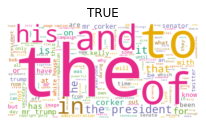

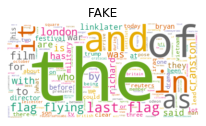

IndexError: list index out of range

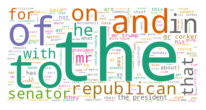

In [24]:
#Reset the output dimensions

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
label = ['TRUE', 'FAKE']

#create subplots for each label

for index, Label in enumerate(data_dtm.columns):
    wc.generate(data_clean.Body[Label])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(label[index])
    
    plt.show()

In [ ]:
#add the clean data into the dataset